%%capture
!pip install pandas==1.0.5;
!pip install numpy==1.19.0;
!pip install seaborn==0.10.1;
!pip install matplotlib==3.2.1;
!pip install statsmodels==0.11.1;
!pip install plotly

In [282]:
import numpy                            as      np
import pandas                           as      pd
from sklearn                            import  metrics

import statsmodels
from statsmodels.tsa.seasonal           import  seasonal_decompose

import plotly.graph_objects             as      go
from plotly.subplots                    import  make_subplots
import seaborn                          as      sns
from matplotlib                         import  pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [283]:
rd1 = pd.read_csv(r'..\data\Rose.csv', parse_dates=['YearMonth'],index_col='YearMonth'); rd1.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [284]:
rd2 = pd.read_csv(r'..\data\Sparkling.csv', parse_dates=['YearMonth'],index_col='YearMonth'); rd2.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


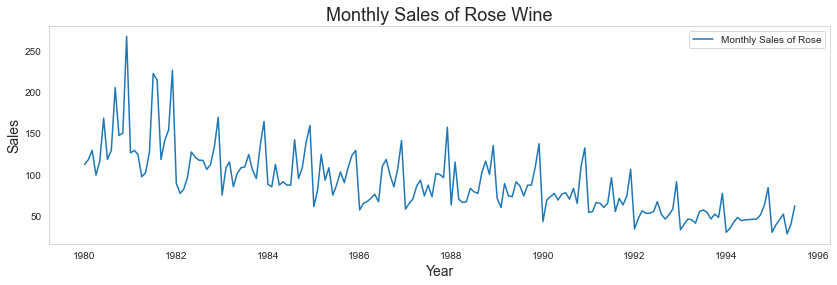

In [285]:
figure, axes = plt.subplots(1,1,figsize=(14,4))
sns.lineplot(y=rd1['Rose'],x=rd1.index)
plt.legend(['Monthly Sales of Rose'])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Monthly Sales of Rose Wine', fontsize=18)
plt.grid(); plt.show()

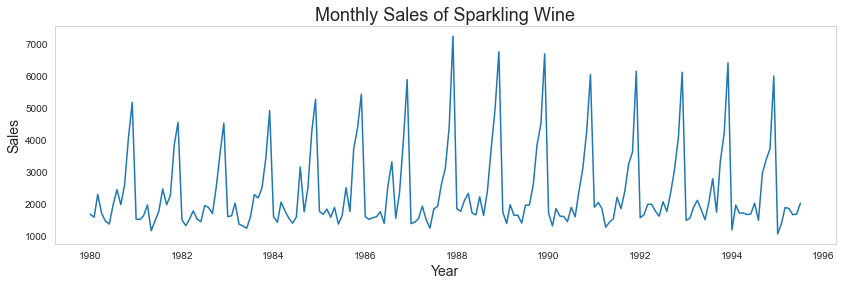

In [286]:
figure, axes = plt.subplots(1,1,figsize=(14,4))
sns.lineplot(y=rd2['Sparkling'],x=rd2.index)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Monthly Sales of Sparkling Wine', fontsize=18)
plt.grid(); plt.show()

In [287]:
rd1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [288]:
rd2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [289]:
round(rd1.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Rose,185.0,90.39,39.18,28.0,63.0,86.0,112.0,267.0


In [290]:
round(rd2.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.42,1295.11,1070.0,1605.0,1874.0,2549.0,7242.0


Text(0.5, 1.0, 'Boxplot of Rose wine sales')

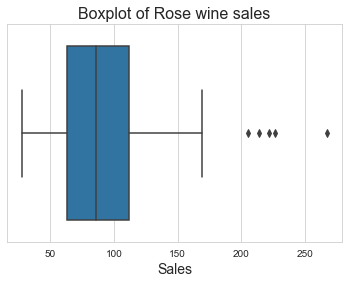

In [291]:
sns.boxplot(rd1)
plt.xlabel('Sales', fontsize=14)
plt.title('Boxplot of Rose wine sales', fontsize=16)

Text(0.5, 1.0, 'Boxplot of Sparkling wine sales')

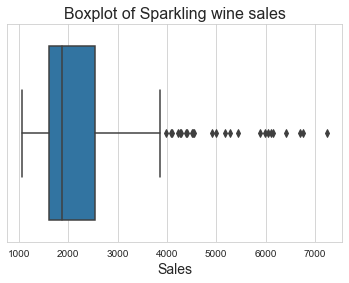

In [292]:
sns.boxplot(rd2)
plt.xlabel('Sales', fontsize=14)
plt.title('Boxplot of Sparkling wine sales', fontsize=16)

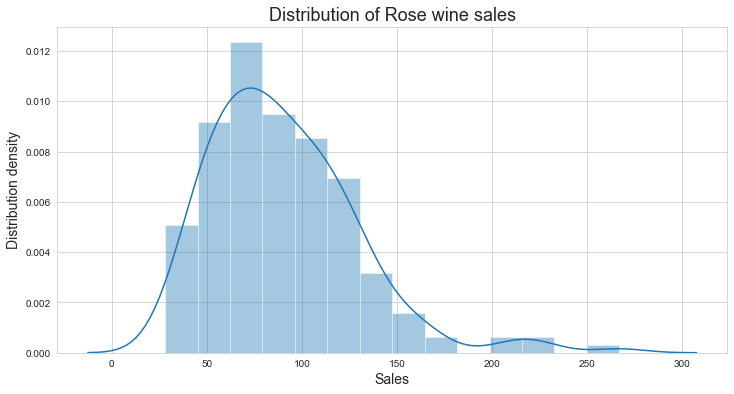

In [293]:
fig = plt.subplots(figsize=(12,6)); sns.set_style('whitegrid')
sns.distplot(rd1)
plt.title('Distribution of Rose wine sales', fontsize=18); plt.xlabel('Sales', fontsize=14); plt.ylabel('Distribution density', fontsize=14);
plt.show()

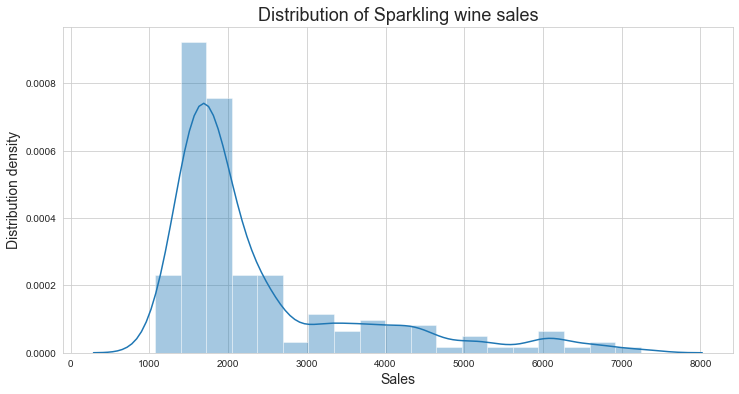

In [294]:
fig = plt.subplots(figsize=(12,6)); sns.set_style('whitegrid')
sns.distplot(rd2)
plt.title('Distribution of Sparkling wine sales', fontsize=18); plt.xlabel('Sales', fontsize=14); plt.ylabel('Distribution density', fontsize=14);
plt.show()

In [295]:
rd1.isnull()

,Rose
YearMonth,
1980-01-01,False
1980-02-01,False
1980-03-01,False
1980-04-01,False
1980-05-01,False
...,...
1995-03-01,False
1995-04-01,False
1995-05-01,False


In [296]:
import plotly.express as px

fig = px.line(rd1,x=rd1.index,y=rd1['Rose'])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons = list([
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

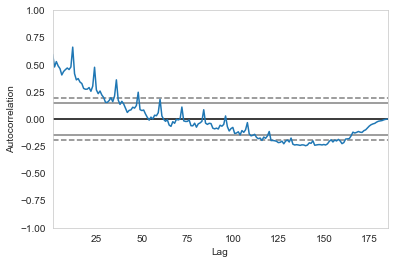

In [297]:
pd.plotting.autocorrelation_plot(rd1.dropna())

Text(0.5, 1.0, 'Lag plot with lag = 1')

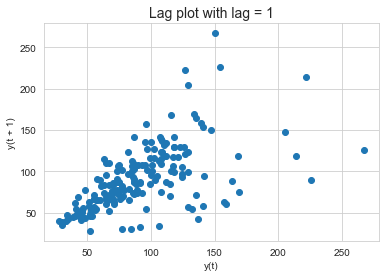

In [298]:
pd.plotting.lag_plot(rd1,lag=1)
plt.title('Lag plot with lag = 1', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 2')

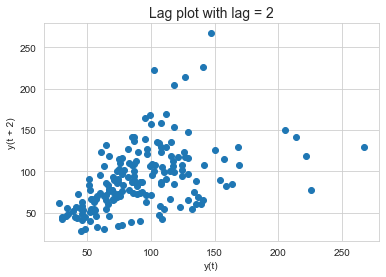

In [299]:
pd.plotting.lag_plot(rd1,lag=2)
plt.title('Lag plot with lag = 2', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 3')

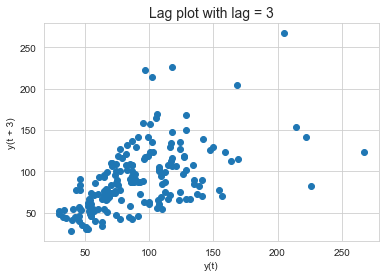

In [300]:
pd.plotting.lag_plot(rd1,lag=3)
plt.title('Lag plot with lag = 3', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 12')

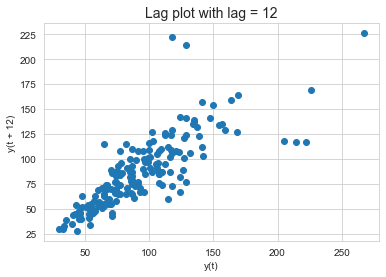

In [301]:
pd.plotting.lag_plot(rd1,lag=12)
plt.title('Lag plot with lag = 12', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 11')

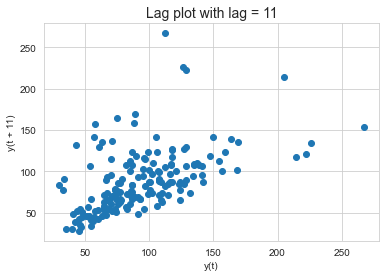

In [302]:
pd.plotting.lag_plot(rd1,lag=11)
plt.title('Lag plot with lag = 11', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 10')

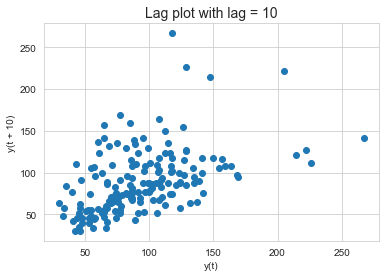

In [303]:
pd.plotting.lag_plot(rd1,lag=10)
plt.title('Lag plot with lag = 10', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 13')

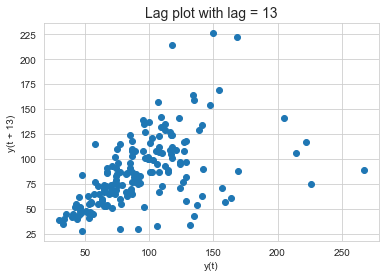

In [304]:
pd.plotting.lag_plot(rd1,lag=13)
plt.title('Lag plot with lag = 13', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 24')

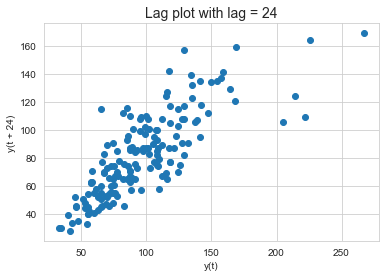

In [305]:
pd.plotting.lag_plot(rd1,lag=24)
plt.title('Lag plot with lag = 24', fontsize=14)

In [306]:
rd1.iloc[162:176]

,Rose
YearMonth,
1993-07-01,57.0
1993-08-01,54.0
1993-09-01,46.0
1993-10-01,52.0
1993-11-01,48.0
1993-12-01,77.0
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0


In [307]:
fig = px.line(rd1,x=rd1.index,y=rd1['Rose'])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons = list([
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [308]:
rd1.loc['1994-07-01']=57

In [309]:
rd1.loc['1994-08-01']=54

In [310]:
fig = px.line(rd1,x=rd1.index,y=rd1['Rose'])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons = list([
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

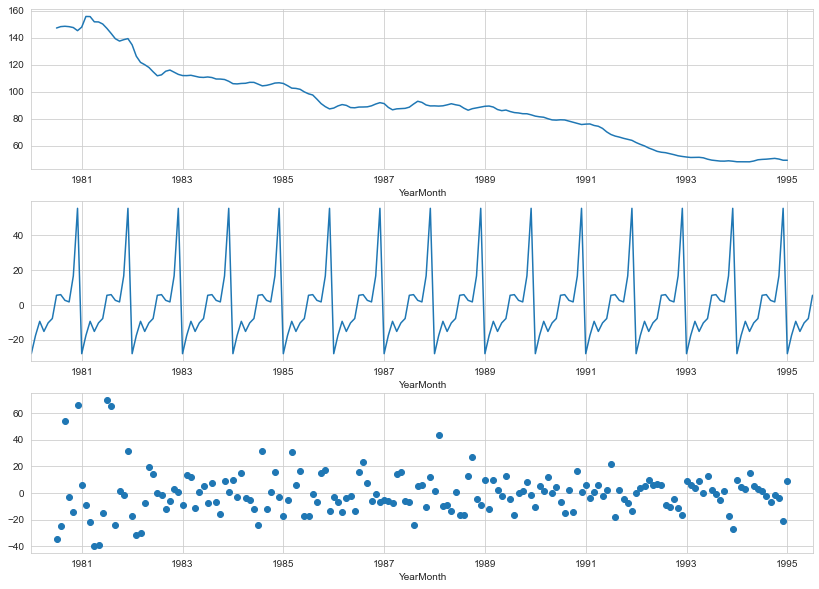

In [311]:
figure,axes = plt.subplots(3,1,figsize=(14,10))
rose_add_dcmps = seasonal_decompose(rd1, model='additive')
rose_add_dcmps.trend.plot(ax=axes[0])
rose_add_dcmps.seasonal.plot(ax=axes[1])
rose_add_dcmps.resid.plot(ax=axes[2], style='o')
plt.show()

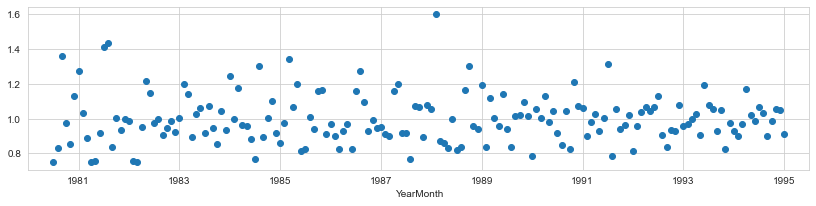

In [312]:
figure,axes = plt.subplots(1,1,figsize=(14,3))
rose_mul_dcmps = seasonal_decompose(rd1, model='multiplicative')
rose_mul_dcmps.resid.plot(style='o')
plt.show()

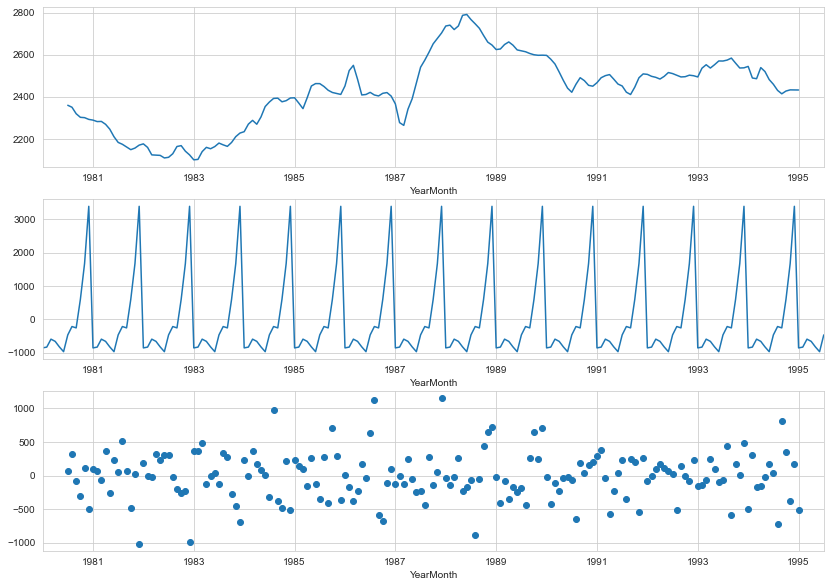

In [313]:
figure,axes = plt.subplots(3,1,figsize=(14,10))
sparkling_add_dcmps = seasonal_decompose(rd2, model='additive')
sparkling_add_dcmps.trend.plot(ax=axes[0])
sparkling_add_dcmps.seasonal.plot(ax=axes[1])
sparkling_add_dcmps.resid.plot(ax=axes[2], style='o')
plt.show()

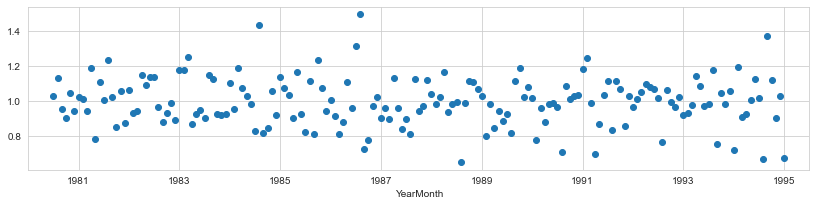

In [314]:
figure,axes = plt.subplots(1,1,figsize=(14,3))
sparkling_mul_dcmps = seasonal_decompose(rd2, model='multiplicative')
sparkling_mul_dcmps.resid.plot(style='o')
plt.show()

In [315]:
df_rose = rd1.copy()
df_sparkling = rd2.copy()

In [316]:
df_rose.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [317]:
train_Rose = df_rose.iloc[:132]
test_Rose = df_rose.iloc[132:]

In [318]:
train_Sparkling = df_sparkling.iloc[:132]
test_Sparkling = df_sparkling.iloc[132:]

In [319]:
print('The shape of training data for Rose wine is :',train_Rose.shape)
print('The shape of test data for Rose wine is :',test_Rose.shape)
print('The shape of training data for Sparkling wine is :',train_Sparkling.shape)
print('The shape of test data for Sparkling wine is :',test_Sparkling.shape)

The shape of training data for Rose wine is : (132, 1)
The shape of test data for Rose wine is : (55, 1)
The shape of training data for Sparkling wine is : (132, 1)
The shape of test data for Sparkling wine is : (55, 1)


In [320]:
test_Rose.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [321]:
test_Sparkling.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [322]:
train_Rose.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [323]:
train_Sparkling.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [324]:
plot1 = go.Line(x=train_Rose.index,y=train_Rose['Rose'],name='Training')
plot2 = go.Line(x=test_Rose.index,y=test_Rose['Rose'],name='Test')

fig_Rose = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Rose.add_trace(plot1)
fig_Rose.add_trace(plot2)
fig_Rose.update_layout(
    title="Plotting training and test data of Rose wine",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Rose.show()

In [325]:
plot1 = go.Line(x=train_Sparkling.index,y=train_Sparkling['Sparkling'],name='Training')
plot2 = go.Line(x=test_Sparkling.index,y=test_Sparkling['Sparkling'],name='Test')

fig_Sparkling = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Sparkling.add_trace(plot1)
fig_Sparkling.add_trace(plot2)
fig_Sparkling.update_layout(
    title="Plotting training and test data of Sparkling wine",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Sparkling.show()

## Naive Model - Forecast

In [326]:
NaiveModel_train = train_Rose.copy()
NaiveModel_test = test_Rose.copy()

In [327]:
NaiveModel_test['naive'] = np.asarray(train_Rose['Rose'])[len(np.asarray(train_Rose['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

In [328]:
plot3 = go.Line(x=NaiveModel_test.index,y=NaiveModel_test['naive'],name='NaiveModel'); fig_Rose.add_trace(plot3); fig_Rose.show()

In [329]:
rmse_test = metrics.mean_squared_error(test_Rose['Rose'],NaiveModel_test['naive'],squared=False)

TestResults_Rose = pd.DataFrame({'Test RMSE': [rmse_test]},index=['NaiveModel'])

TestResults_Rose

,Test RMSE
NaiveModel,79.34665


In [330]:
NaiveModel_train = train_Sparkling.copy()
NaiveModel_test = test_Sparkling.copy()
NaiveModel_test['naive'] = np.asarray(train_Sparkling['Sparkling'])[len(np.asarray(train_Sparkling['Sparkling']))-1]
NaiveModel_test['naive'].head()
plot3 = go.Line(x=NaiveModel_test.index,y=NaiveModel_test['naive'],name='NaiveModel'); fig_Sparkling.add_trace(plot3); fig_Sparkling.show()
rmse_test = metrics.mean_squared_error(test_Sparkling['Sparkling'],NaiveModel_test['naive'],squared=False)

TestResults_Sparkling = pd.DataFrame({'Test RMSE': [rmse_test]},index=['NaiveModel'])

TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352


## Simple Average

In [331]:
SimpleAverage_train = train_Rose.copy()
SimpleAverage_test = test_Rose.copy()
SimpleAverage_test['SimpleAvg'] = train_Rose['Rose'].mean()
plot4 = go.Line(x=SimpleAverage_test.index,y=SimpleAverage_test['SimpleAvg'],name='SimpleAverage'); fig_Rose.add_trace(plot4); fig_Rose.show()
rmse_test = metrics.mean_squared_error(test_Rose['Rose'],SimpleAverage_test['SimpleAvg'],squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test]},index=['SimpleAverage'])

TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745


In [332]:
SimpleAverage_train = train_Sparkling.copy()
SimpleAverage_test = test_Sparkling.copy()
SimpleAverage_test['SimpleAvg'] = train_Sparkling['Sparkling'].mean()
plot4 = go.Line(x=SimpleAverage_test.index,y=SimpleAverage_test['SimpleAvg'],name='SimpleAverage'); fig_Sparkling.add_trace(plot4); fig_Sparkling.show()
rmse_test = metrics.mean_squared_error(test_Sparkling['Sparkling'],SimpleAverage_test['SimpleAvg'],squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test]},index=['SimpleAverage'])

TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804


## Moving Average

In [333]:
MovingAverage = rd1.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
1980-06-01,168.0,142.0,128.00,123.666667,NaN
1980-07-01,118.0,143.0,125.25,124.666667,NaN
1980-08-01,129.0,123.5,132.75,126.500000,NaN
1980-09-01,205.0,167.0,155.00,139.166667,132.666667


In [334]:
MovingAverage_train = MovingAverage.iloc[:132].copy() 
MovingAverage_test = MovingAverage.iloc[132:].copy()

plot5 = go.Line(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_2'],name='2 pt Trailing MA'); fig_Rose.add_trace(plot5); 
plot6 = go.Line(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_4'],name='4 pt Trailing MA'); fig_Rose.add_trace(plot6); 
plot7 = go.Line(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_6'],name='6 pt Trailing MA'); fig_Rose.add_trace(plot7); 
plot8 = go.Line(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_9'],name='9 pt Trailing MA'); fig_Rose.add_trace(plot8); 

fig_Rose.show()

In [335]:
rmse_test_2 = metrics.mean_squared_error(test_Rose['Rose'],MovingAverage_test['Trailing_2'],squared=False)
rmse_test_4 = metrics.mean_squared_error(test_Rose['Rose'],MovingAverage_test['Trailing_4'],squared=False)
rmse_test_6 = metrics.mean_squared_error(test_Rose['Rose'],MovingAverage_test['Trailing_6'],squared=False)
rmse_test_9 = metrics.mean_squared_error(test_Rose['Rose'],MovingAverage_test['Trailing_9'],squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test_2,rmse_test_4
                                          ,rmse_test_6,rmse_test_9]}
                           ,index=['2ptTrailingMovingAverage','4ptTrailingMovingAverage'
                                   ,'6ptTrailingMovingAverage','9ptTrailingMovingAverage'])

TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745
2ptTrailingMovingAverage,11.571910
4ptTrailingMovingAverage,14.482081
6ptTrailingMovingAverage,14.544429
9ptTrailingMovingAverage,14.771062


In [336]:
MovingAverage = rd2.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage_train = MovingAverage.iloc[:132].copy() 
MovingAverage_test = MovingAverage.iloc[132:].copy()

plot5 = go.Line(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_2'],name='2 pt Trailing MA'); fig_Sparkling.add_trace(plot5); 
plot6 = go.Line(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_4'],name='4 pt Trailing MA'); fig_Sparkling.add_trace(plot6); 
plot7 = go.Line(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_6'],name='6 pt Trailing MA'); fig_Sparkling.add_trace(plot7); 
plot8 = go.Line(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_9'],name='9 pt Trailing MA'); fig_Sparkling.add_trace(plot8); 

fig_Sparkling.show()

In [337]:
rmse_test_2 = metrics.mean_squared_error(test_Sparkling['Sparkling'],MovingAverage_test['Trailing_2'],squared=False)
rmse_test_4 = metrics.mean_squared_error(test_Sparkling['Sparkling'],MovingAverage_test['Trailing_4'],squared=False)
rmse_test_6 = metrics.mean_squared_error(test_Sparkling['Sparkling'],MovingAverage_test['Trailing_6'],squared=False)
rmse_test_9 = metrics.mean_squared_error(test_Sparkling['Sparkling'],MovingAverage_test['Trailing_9'],squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test_2,rmse_test_4
                                          ,rmse_test_6,rmse_test_9]}
                           ,index=['2ptTrailingMovingAverage','4ptTrailingMovingAverage'
                                   ,'6ptTrailingMovingAverage','9ptTrailingMovingAverage'])

TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804
2ptTrailingMovingAverage,813.400684
4ptTrailingMovingAverage,1156.589694
6ptTrailingMovingAverage,1283.927428
9ptTrailingMovingAverage,1346.278315


## Linear Regression

In [338]:
dfRose = rd1.copy()
dfRose['X'] = np.arange(len(dfRose))

In [339]:
dfSparkling = rd2.copy()
dfSparkling['X'] = np.arange(len(dfSparkling))

In [340]:
train_Rose = dfRose.iloc[:132].copy() 
test_Rose = dfRose.iloc[132:].copy()

train_Sparkling = dfSparkling.iloc[:132].copy() 
test_Sparkling = dfSparkling.iloc[132:].copy()

In [341]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(train_Rose['X'].to_numpy().reshape(-1,1),train_Rose['Rose'])
y_test_pred = LR.predict(test_Rose['X'].to_numpy().reshape(-1,1))

plot9 = go.Line(x=test_Rose.index,y=y_test_pred,name='LinearRegression'); fig_Rose.add_trace(plot9); 

fig_Rose.show()

In [342]:
rmse_test = metrics.mean_squared_error(test_Rose['Rose'],y_test_pred,squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test]}
                           ,index=['LinearRegression'])

TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745
2ptTrailingMovingAverage,11.571910
4ptTrailingMovingAverage,14.482081
6ptTrailingMovingAverage,14.544429
9ptTrailingMovingAverage,14.771062
LinearRegression,15.257465


In [343]:
train_Sparkling = dfSparkling.iloc[:132].copy() 
test_Sparkling = dfSparkling.iloc[132:].copy()

train_Sparkling = dfSparkling.iloc[:132].copy() 
test_Sparkling = dfSparkling.iloc[132:].copy()

LR = LinearRegression()
LR.fit(train_Sparkling['X'].to_numpy().reshape(-1,1),train_Sparkling['Sparkling'])
y_test_pred = LR.predict(test_Sparkling['X'].to_numpy().reshape(-1,1))

plot9 = go.Line(x=test_Sparkling.index,y=y_test_pred,name='LinearRegression'); fig_Sparkling.add_trace(plot9); 

fig_Sparkling.show()

rmse_test = metrics.mean_squared_error(test_Sparkling['Sparkling'],y_test_pred,squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test]}
                           ,index=['LinearRegression'])

TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804
2ptTrailingMovingAverage,813.400684
4ptTrailingMovingAverage,1156.589694
6ptTrailingMovingAverage,1283.927428
9ptTrailingMovingAverage,1346.278315
LinearRegression,1389.135175
